### The dataset has 812 columns and 46 columns.Out of the 46 columns, only 38 columns are relevant for this analysis.
### The objective of our analysis is to rank the 28 areas present within the data based on illiteracy,lack of educational infrastructure and demographic
### Analysing and Ranking the areas in such a way will help us identify the areas which need the attention of the NGO first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)

In [3]:
data=pd.read_csv("Town-wise-education - Karnataka.csv")

In [192]:
data.head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
0,C2308,29,1,40117000,Urban,Belgaum (M Corp.),All ages,399653,204598,195055,91358,36857,54501,308295,167741,140554,3510,1821,1689,50022,25892,24130,69598,34031,35567,29442,15986,13456,74529,39027,35502,31525,18275,13250,1371,1009,362,7143,5210,1933,41152,26488,14664,3,2,1
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Removing the columns which donot affect the scope of our analysis

In [179]:
dt=data.iloc[:,5:43]
dt.head()

,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational Level - Literate without Educational Level Persons,Educational Level - Literate without Educational Level Males,Educational Level - Literate without Educational Level Females,Educational Level - Below Primary Persons,Educational Level - Below Primary Males,Educational Level - Below Primary Females,Educational Level - Primary Persons,Educational Level - Primary Males,Educational Level - Primary Females,Educational Level - Middle Persons,Educational Level - Middle Males,Educational Level - Middle Females,Educational Level - Matric/Secondary Persons,Educational Level - Matric/Secondary Males,Educational Level - Matric/Secondary Females,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Persons,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Males,Educational Level - Higher Secondary/Intermediate Pre-University/Senior Secondary Females,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females
0,Belgaum (M Corp.),All ages,399653,204598,195055,91358,36857,54501,308295,167741,140554,3510,1821,1689,50022,25892,24130,69598,34031,35567,29442,15986,13456,74529,39027,35502,31525,18275,13250,1371,1009,362,7143,5210,1933,41152,26488,14664
1,Belgaum (M Corp.),0-6,47642,24768,22874,47642,24768,22874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Belgaum (M Corp.),7,6759,3495,3264,1375,662,713,5384,2833,2551,48,28,20,5336,2805,2531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Belgaum (M Corp.),8,8067,4152,3915,568,292,276,7499,3860,3639,15,11,4,7484,3849,3635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Belgaum (M Corp.),9,6948,3559,3389,275,137,138,6673,3422,3251,11,4,7,6291,3235,3056,371,183,188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final=pd.DataFrame()
df_final['Area']=pd.unique(dt["Area Name"])

# Exploring the data in different ways  to figure out the key features to be used for ranking our areas

### 1. Plotting Total illiteracy across Different Areas in descending order 

In [10]:
ratio_illiterate=[]
ratio_illiterate_male=[]
ratio_illiterate_female=[]
for x in np.unique(dt['Area Name']):
    ratio_illiterate.append(dt[dt['Area Name']==x].iloc[0,5]/dt[dt['Area Name']==x].iloc[0,2])
    ratio_illiterate_male.append(dt[dt['Area Name']==x].iloc[0,6]/dt[dt['Area Name']==x].iloc[0,3])
    ratio_illiterate_female.append(dt[dt['Area Name']==x].iloc[0,7]/dt[dt['Area Name']==x].iloc[0,4])

In [12]:
df_illiteracy_overall=pd.DataFrame()
df_illiteracy_overall['Area']=pd.Series(np.unique(dt['Area Name']))
df_illiteracy_overall['Ratio of Illiterate Person']=pd.Series(ratio_illiterate).values
df_illiteracy_overall['Ratio of Illiterate Male']=pd.Series(ratio_illiterate_male).values
df_illiteracy_overall['Ratio of Illiterate Female']=pd.Series(ratio_illiterate_female).values
dft=df_illiteracy_overall.sort_values('Ratio of Illiterate Person',ascending=0)

In [100]:
x=list(dft.iloc[:,0])
l=[]
for k in pd.unique(df_final['Area']):
    l.append(x.index(k))
df_final['Rank of Overall Illiteracy']=pd.Series(l).values

Text(0.5,0,'District')

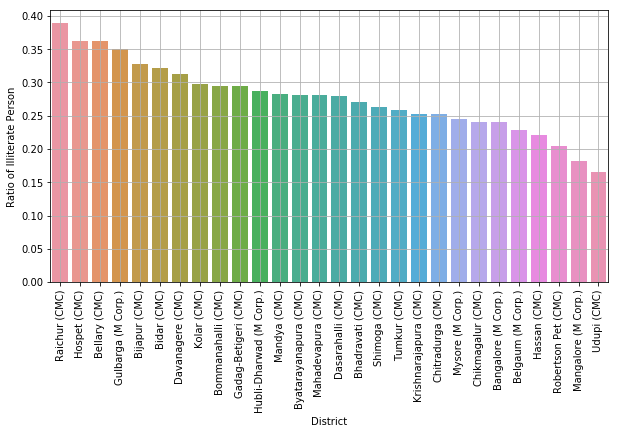

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=np.arange(0,28,1),y='Ratio of Illiterate Person',data=dft)
plt.xticks(np.arange(0,28,1),dft.iloc[:,0],rotation=90)
plt.grid(True)
plt.xlabel("District")

This plot shows the illiteracy rate in desending order for the 28 areas in the data.Using this plot we can figure out which areas need more attention and a further analysis can be done to see why and where that particular area's illiteracy rate is so high

### 2. Potting Overall Female illiteracy across Different Areas in descending order  

Text(0.5,0,'District')

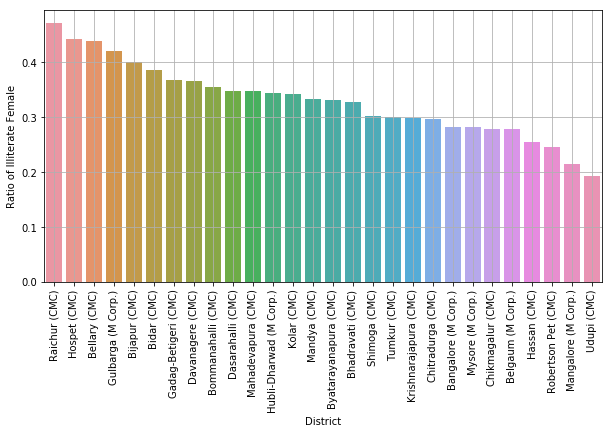

In [40]:
dft=df_illiteracy_overall.sort_values('Ratio of Illiterate Female',ascending=0)
plt.figure(figsize=(10,5))
sns.barplot(x=np.arange(0,28,1),y='Ratio of Illiterate Female',data=dft)
plt.xticks(np.arange(0,28,1),dft.iloc[:,0],rotation=90)
plt.grid(True)
plt.xlabel("District")

In [101]:
x=list(dft.iloc[:,0])
l=[]
for k in pd.unique(df_final['Area']):
    l.append(x.index(k))
df_final['Rank of Overall Female Illiteracy']=pd.Series(l).values

#### Below is the list of indexes to be used to generate plots for a particular area using the functions described below

In [190]:
pd.DataFrame(pd.unique(dt['Area Name']))

,0
0,Belgaum (M Corp.)
1,Bijapur (CMC)
2,Gulbarga (M Corp.)
3,Bidar (CMC)
4,Raichur (CMC)
5,Gadag-Betigeri (CMC)
6,Hubli-Dharwad (M Corp.)
7,Hospet (CMC)
8,Bellary (CMC)
9,Chitradurga (CMC)


### 3. Data Summary 

In [187]:
df=dt.iloc[0::29]
def datsum(arg):
    plt.figure(figsize=(18,5))
    plt.subplot(131)
    plt.pie(df.iloc[arg,5:9:3],labels=['Illiterate','Literate'],autopct='%1.0f%%')
    plt.title("Overall")
    plt.subplot(132)
    plt.title("Male Population")
    plt.pie(df.iloc[arg,6:10:3],labels=['Illiterate','Literate'],autopct='%1.0f%%')
    plt.subplot(133)
    plt.title("Female Population")
    plt.pie(df.iloc[arg,7:11:3],labels=['Illiterate','Literate'],autopct='%1.0f%%')

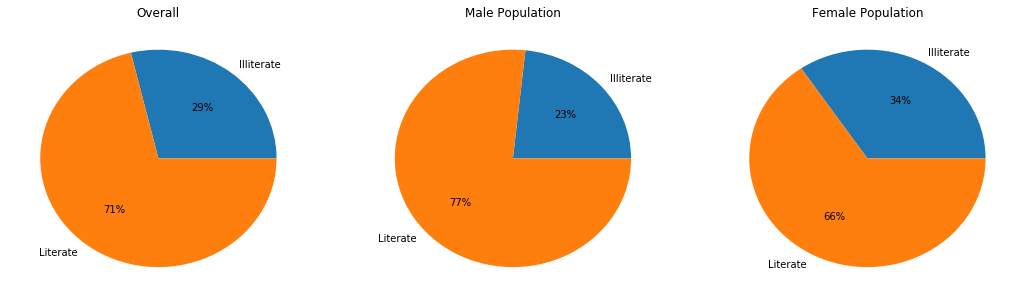

In [191]:
datsum(6)

#### The above function shows distribution of illiterate to literate in the oveall population, male population and female population.This helps us get an overall summary for any area.The input to the function is the index as genrated above

### 3. Plotting Line chart for trend of illiteracy with age in each area

In [102]:
ratio_illiterate_age=[]
for x in np.arange(2,17,1):
    ratio_illiterate_age.append(dt.iloc[x::29,5]/dt.iloc[x::29,2])

In [103]:
df_illiteracy_age=pd.DataFrame()
df_illiteracy_age["Area"]=pd.Series(pd.unique(dt['Area Name'])).values
for x in range(15):
    df_illiteracy_age[x]=pd.Series(ratio_illiterate_age[x]).values

A function which takes the input of the area we wanna see the trend for and plots the illiteracy rate for that area with increasung age

In [51]:
def age_illiteracy(x):
    plt.figure(figsize=(15,5))
    plt.plot(df_illiteracy_age.iloc[x,1:])
    plt.xticks(np.arange(0,15,1),dt.iloc[2:27,1])
    plt.title(df_illiteracy_age.iloc[x,0])
    plt.ylabel("illiteracy Rate")
    plt.xlabel("Age Group")
    plt.grid(True)

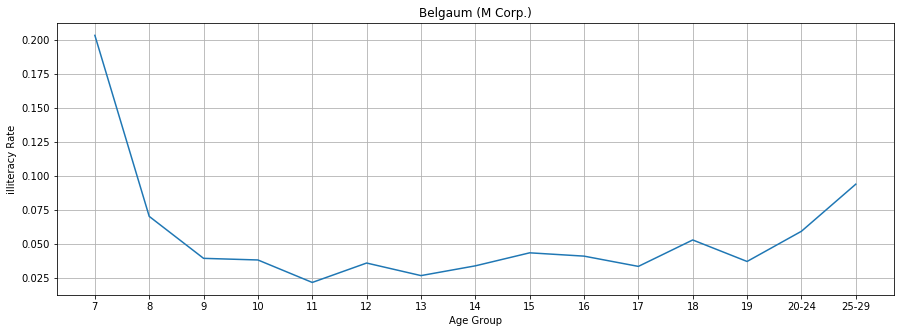

In [52]:
age_illiteracy(0)

#### 1. In the above chart we can see that in the area of Raichur which has the highest overall illiteracy there is a lack of eduaction in children and even a high llliteracy among youths which means that not many people are professionally qualified
#### 2. To see the age-wise plot of a particular area the we need to pass it's corresponding index that can be found using the dataframe df

In [142]:
l=[]
for x in range(28):
    l.append(np.sum(np.log(np.arange(2,17))[::-1]*df_illiteracy_age.iloc[x,1:]))
l=list(27-np.argsort(l).argsort())
df_final["Rank of illiteravcy age-wise"]=pd.Series(l).values

###### The above code calculates the ranks for area based on illiteracy based on age i.e higher the rank more is the illiteracy among children aged between 7-25 years 

### 4. Calculating ratios of literate people across different level of education to figure out the lack of infrastructure and awareness towrds education

In [64]:
col=["Ratio of Below Primary","Ratio of Primary","Ratio of Middle","Ratio of Secondary","Ratio of Senior Secondary","Ratio of Professionally Qualified"]
df_literateedlevel=pd.DataFrame()
df_literateedlevel['Ratio_type']=pd.Series(col).values
for x in pd.unique(dt['Area Name']):
    y1=list(dt[dt["Area Name"]==x].iloc[0,14:28:3]/dt[dt["Area Name"]==x].iloc[0,8])
    y1.append(np.sum(np.array(dt[dt["Area Name"]==x].iloc[0,29::3]))/dt[dt["Area Name"]==x].iloc[0,8])
    df_literateedlevel[x]=pd.Series(y1).values

In [67]:
def ploteducationratio(arg):
    plt.barh(np.arange(0,6),df_literateedlevel.iloc[0:,arg])
    plt.yticks(np.arange(0,6),col)
    plt.title(df_literateedlevel.columns[arg])
    plt.grid(True)

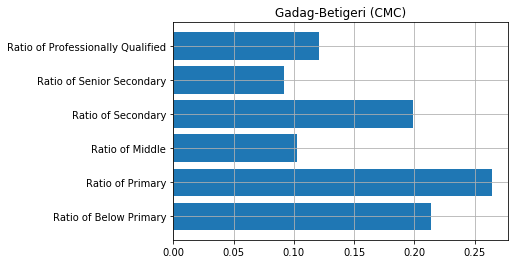

In [77]:
ploteducationratio(6)

###### As can be seen in the above chart that in the area of Raichur which has the highest rate of illiteracy most of the people who are literate are also not that aware about education and are no educated beyond Primary level

In [155]:
t=[]
for x in range(28):
    t.append(np.sum(np.log(np.arange(2,8))*df_literateedlevel.iloc[0:,x+1]))
l=list(np.argsort(t).argsort())
df_final["Rank Education Level"]=pd.Series(l).values

###### The above piece of ranks the areas based on where more people have higher education i.e higher the rank less are the number of people have went for higher education 

### 5. Checking in  which each areas compared to male population ,female population is going less for higher education

In [78]:
col=["Ratio of Below Primary","Ratio of Primary","Ratio of Middle","Ratio of Secondary","Ratio of Senior Secondary","Ratio of Professionally Qualified"]
df_femaleeducation=pd.DataFrame()
df_femaleeducation['Ratio_type']=pd.Series(col).values
for x in pd.unique(dt['Area Name']):
    ratio_female=list(dt[dt["Area Name"]==x].iloc[0,16:29:3]/dt[dt["Area Name"]==x].iloc[0,10])
    ratio_female.append(np.sum(np.array(dt[dt["Area Name"]==x].iloc[0,31::3]))/dt[dt["Area Name"]==x].iloc[0,10])
    ratio_male=list(dt[dt["Area Name"]==x].iloc[0,15:29:3]/dt[dt["Area Name"]==x].iloc[0,9])
    ratio_male.append(np.sum(np.array(dt[dt["Area Name"]==x].iloc[0,30::3]))/dt[dt["Area Name"]==x].iloc[0,9])
    y=np.array(ratio_female)/np.array(ratio_male)
    df_femaleeducation[x]=pd.Series(y).values

In [79]:
def plotgendereducatioratio(arg):
    plt.plot(np.arange(0,6),df_femaleeducation.iloc[0:,arg])
    plt.xticks(np.arange(0,6),col,rotation=90)
    plt.title(df_femaleeducation.columns[arg])
    plt.grid(True)

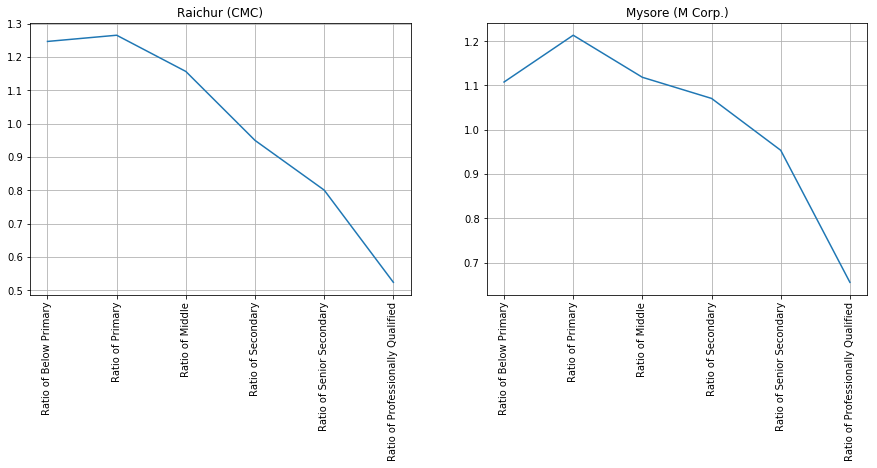

In [185]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plotgendereducatioratio(5)
plt.subplot(122)
plotgendereducatioratio(28)

###### The above plot shows us that ratio of females who are iliterate compared to ratio of males who are literate keeps decreasing as the level of eduaction imcrease which tells us that females are not pursuing higher education.

In [164]:
t=[]
for x in range(28):
    t.append(np.sum(np.log(np.arange(2,8))*df_femaleeducation.iloc[0:,x+1]))
l=list(np.argsort(t).argsort())
df_final["Rank Female Education"]=pd.Series(l).valuesvb

###### The above piece of ranks the areas based on where more people have higher education i.e higher the rank less are the number of females who have went for higher education compared to males who have went for higher education

# Model Prepartion

### Objective: Based on the initial exploration of data the objective of this analysis is to list the 28 areas in this data based on which require the attention of the NGO more i,e higher the rank more is the need.The ranking will be generated based on a score generated on a couple of features.The features are described below;

##### 1. Ranking based on overall illiteracy in the area
##### 2. Ranking based on overall female illiteracy in the area
##### 3. Ranking based on illiteracy from age from 7 years-25 years i,e higher the ranking more is the illiteracy
##### 4. Ranking based on distribution of literate people going for higher education i.e higher the ranking less are the number of people going for higher education
##### 5. Ranking based on ratio of female illiterate population which goes for higher education compared to ratio of male population that goes for higher education i.e higher the rank less are the number of female population going for higher education

##### Once we have the features extracted from the data the next step is to get the average rank of the areas based on the five features described above.The dataset df_final contains the data used for ranking the areas which contains seven columns.The column Overall rank rells the score of the area based on the five features.Lower the overall score more is the attention required by the NGO.Using this table NGO can make better decisions on which area to provide more help

In [176]:
l=[]
for x in range(28):
    l.append(np.mean(df_final.iloc[x,1:]))
df_final["Overall Rank"]=pd.Series(l).values

In [178]:
df_final.sort_values("Overall Rank")

,Area,Rank of Overall Illiteracy,Rank of Overall Female Illiteracy,Rank of illiteravcy age-wise,Rank Education Level,Rank Female Education,Overall Rank
4,Raichur (CMC),0,0,0,5,3,4.400000
7,Hospet (CMC),1,1,3,1,2,4.400000
8,Bellary (CMC),2,2,1,3,1,4.566667
1,Bijapur (CMC),4,4,4,7,5,7.066667
2,Gulbarga (M Corp.),3,3,2,6,14,7.733333
5,Gadag-Betigeri (CMC),6,6,16,0,0,7.733333
10,Davanagere (CMC),7,7,5,4,10,8.566667
6,Hubli-Dharwad (M Corp.),11,11,9,8,6,10.566667
3,Bidar (CMC),5,5,7,14,15,10.733333
23,Bommanahalli (CMC),8,8,8,16,7,10.900000
